Year
2000-01-01    6.93
2000-02-01    6.96
2000-03-01    7.03
2000-04-01    7.05
2000-05-01    7.25
Name: Price, dtype: float64


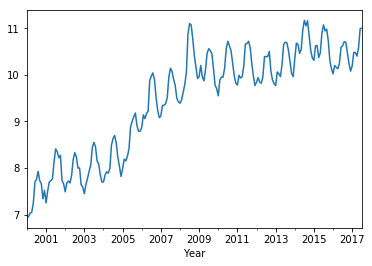

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import math
 
def parser(x):
	return datetime.strptime( x, '%Y-%m')
 
series = read_csv('loadnew4.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

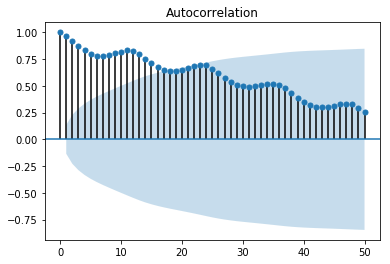

In [7]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv('loadnew4.csv', header=0)
plot_acf(series, lags=50)
pyplot.show()

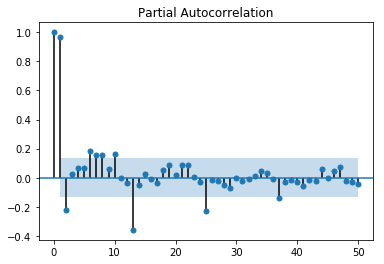

In [8]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = Series.from_csv('loadnew4.csv', header=0)
plot_pacf(series, lags=50)
pyplot.show()

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  211
Model:                     ARMA(1, 1)   Log Likelihood                  34.459
Method:                       css-mle   S.D. of innovations              0.204
Date:                Sun, 17 Dec 2017   AIC                            -60.919
Time:                        06:04:33   BIC                            -47.511
Sample:                    01-01-2000   HQIC                           -55.499
                         - 07-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.2822      0.774     11.999      0.000       7.766      10.798
ar.L1.Price     0.9795      0.015     67.215      0.000       0.951       1.008
ma.L1.Price     0.3592      0.055      6.528    

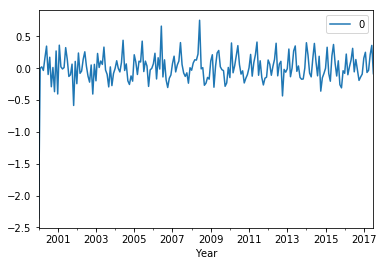

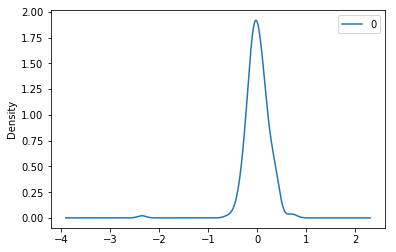

                0
count  211.000000
mean     0.005205
std      0.259587
min     -2.352170
25%     -0.120843
50%      0.001217
75%      0.131543
max      0.755241


In [9]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime( x, '%Y-%m')
 
series = read_csv('loadnew4.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=10.382179, expected=10.360000
predicted=10.374052, expected=10.310000
predicted=10.365790, expected=10.620000
predicted=10.794346, expected=10.630000
predicted=10.667932, expected=10.370000
predicted=10.216909, expected=10.470000
predicted=10.520439, expected=10.890000
predicted=11.124592, expected=11.070000
predicted=11.136546, expected=10.940000
predicted=10.822867, expected=10.980000
predicted=10.982409, expected=10.730000
predicted=10.672551, expected=10.300000
predicted=10.136979, expected=10.130000
predicted=10.127229, expected=10.020000
predicted=10.067552, expected=10.200000
predicted=10.319284, expected=10.160000
predicted=10.175484, expected=10.130000
predicted=10.098540, expected=10.250000
predicted=10.319108, expected=10.590000
predicted=10.745841, expected=10.620000
predicted=10.619703, expected=10.710000
predicted=10.699572, expected=10.700000
predicted=10.704363, expected=10.470000
predicted=10.375674, expected=10.240000
predicted=10.165249, expected=10.080000


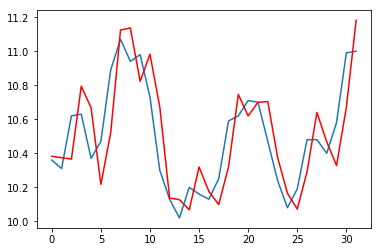

In [26]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

 
def parser(x):
	return datetime.strptime(x, '%Y-%m')
 
series = read_csv('loadnew4.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
r_sq = r2_score(test, predictions)
print('R_sq: %.3f' % r_sq)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()